# Chapter 2: Toolbox for Data Scientists

In this notebook we will learn the basis of the Pandas library for data scientists. 

Let us begin by importing those packages that we will need for our program. In the first cell we put the code to import the `pandas` library as `pd`. This is for convenience; every time we need to use some functionality from the pandas library, we will write `pd` instead of `pandas`. We will also import the two core libraries mentioned also in the book chapter `numpy` library as `np` and `matplotlib.pyplot` library as `plt`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)

### DataFrames 

The key data structure in Pandas is the **DataFrame** object. A DataFrame is basically a tabular data structure, with rows and columns. Rows have a specific index to access them, which can be any name or value. In Pandas, the columns are called **Series**, a special type of data, which in essence consists of a list of several values, where each value has an index. 
Therefore, the DataFrame data structure can be seen as a spreadsheet, but it is much more flexible. 


### Creating a new DataFrame from the scratch


To understand how it works, let us see how to create a DataFrame from a common Python dictionary of lists.


In this example, we use the pandas `DataFrame` object constructor with a dictionary of lists as argument.
The value of each entry in the dictionary is the name of the column, and the lists are their values. 
The DataFrame columns can be arranged at construction time by entering a keyword \emph{columns} with a list of the names of the columns ordered as we want. If the column keyword is not present in the constructor, the columns will be arranged in alphabetical order.

In [2]:
data = {'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF',
                 'ValenciaCF', 'ValenciaCF'],
        'wins':   [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws':  [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }
football = pd.DataFrame(
    data, columns=['year', 'team', 'wins', 'draws', 'losses'])
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


The result is a table where each entry in the dictionary is a column. The index of each row is created automatically taking the position of its elements inside the entry lists, starting from 0.
Although it is very easy to create DataFrames from scratch, most of the time what we will need to do is import chunks of data into a DataFrame structure, we will see how to do this in later examples.

### Open government data analysis example using Pandas

To illustrate how we can use Pandas in a simple real problem, we will start doing some basic analysis of government data. For the sake of transparency, data produced by government entities must be open, meaning that they can be freely used, reused and distributed by anyone. An example of this is the Eurostat, which is the home of European Commission data. Eurostat’s main role is to process and publish comparable statistical information at the European level. The data in Eurostat are provided by each member state and it is free to reuse them, both for noncommercial and commercial purposes (with some minor exceptions).  


Since the amount of data in the Eurostat database is huge, in our first study we are only going to focus on data relative to indicators of educational funding by the member states. Thus, the first thing to do is to retrieve such data from Eurostat. Since open data have to be delivered in a plain text format, CSV (or any other delimiter-separated value) formats are commonly used to store tabular data. In a delimiter-separated value file, each line is a data record and each record consists of one or more fields, separated by the delimiter character (usually a comma). Therefore, the data we will use can be found already downloaded and preprocessed as a CSV file *educ_figdp_1_Data.csv* which can be download from the book's Github webpage. Of course, it can also be downloaded as unprocessed tabular data from the Eurostat database site [Eurostat database site]( http://ec.europa.eu/eurostat/data/database) 
following the path:  `Tables by themes > Population and social conditions > 
Education and training > Education > Indicators on education finance > Public expenditure on education` 

## Reading tabular data

Let us start reading the data we downloaded.
The way to read CSV (or any other separated value, providing the separator character) files in Pandas is by calling the `read_csv` method. Besides the name of the file, we add the *na_values* key argument to this method along with the character that represents "non available data" in the file. Normally, CSV files have a header with the names of the columns. If this is the case,  we can use the *usecols* parameter to select which columns in the file will be used.



In [3]:
edu = pd.read_csv('files/ch02/educ_figdp_1_Data.csv',
                  na_values=':', usecols=['TIME', 'GEO', 'Value'])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In this case, the DataFrame resulting from reading our data is stored in **edu**. The output of the execution shows that the `edu` DataFrame size is 384 rows $\times$ 3 columns. Since the DataFrame is too large to be fully displayed, three dots appear in the middle of each row.


Beside this, Pandas also has functions for reading files with formats such as Excel, HDF5, tabulated files or even the content from the clipboard (`read_excel(), read\_hdf(), read\_table(), read\_clipboard()`). Whichever function we use, the result of reading a file is stored as a DataFrame structure. 



## Viewing Data

To see how the data looks, we can use the `head()` method, which shows just the first five rows. if we put a number as an argument to this method, this will be the number of the first rows that are listed.

In [4]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Similarly, it exists the **tail()** method, which returns the last five rows by default.

In [5]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


If we want to know the names of the columns or the names of the indexes, we can use the DataFrame attributes **columns** and **index** respectively. The names of the columns or indexes can be changed by assigning a new list of the same length to these attributes. 

In [6]:
edu.columns 

Index(['TIME', 'GEO', 'Value'], dtype='object')

In [7]:
edu.index

RangeIndex(start=0, stop=384, step=1)

The values of any DataFrame can be retrieved as a Python array by calling its **values ** attribute.

In [8]:
edu.values

array([[2000, 'European Union (28 countries)', nan],
       [2001, 'European Union (28 countries)', nan],
       [2002, 'European Union (28 countries)', 5.0],
       ...,
       [2009, 'Finland', 6.81],
       [2010, 'Finland', 6.85],
       [2011, 'Finland', 6.76]], dtype=object)

If we just want quick statistical information on all the numeric columns in a data frame, we can use the function **describe()**. The result shows the count, the mean, the standard deviation, the minimum and maximum, and the percentiles, by default, the 25th, 50th, and 75th, for all the values in each column or series.


In [9]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


## Selection

If we want to select a subset of data from a DataFrame, it is necessary to indicate this subset using square brackets **[]** after the DataFrame. The subset can be specified in several ways. If we want to select only one column from a DataFrame, we only need to put its name between the square brackets. The result will be a Series data structure, not a DataFrame, because only one column is retrieved.


In [10]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

If we want to select a subset of rows from a DataFrame, we can do so by indicating a range of rows separated by **:** inside the square brackets. This is commonly known as a *slice* of rows.

Next instruction returns the slice of rows from the 10th to the 13th position. Note that the slice does not use the index labels as references, but the position. In this case, the labels of the rows simply coincide with the position of the rows.

In [11]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


 If we want to select a subset of columns and rows using the labels as our references instead of the positions, we can use **loc** indexing:

Next instruction  will return all the rows between the indexes specified in the slice before the comma, and the columns specified as a list after the comma. In this case, **loc** references the index labels, which means that  **loc** does not return the 90th to 94th rows, but it returns all the rows between the row labeled 90 and the row labeled 94; thus if the index 100 is placed between the rows labeled as 90 and 94, this row would also be returned.

In [12]:
edu.iloc[90:94,:]

,TIME,GEO,Value
90,2006,Belgium,5.98
91,2007,Belgium,6.00
92,2008,Belgium,6.43
93,2009,Belgium,6.57


In [13]:
edu.sample(10,random_state=23)

,TIME,GEO,Value
294,2006,Netherlands,5.50
343,2007,Romania,4.25
178,2010,Greece,NaN
73,2001,Euro area (13 countries),4.97
284,2008,Malta,5.72
193,2001,France,5.95
236,2008,Latvia,5.71
205,2001,Italy,4.83
59,2011,Euro area (17 countries),5.15
252,2000,Luxembourg,NaN


In [14]:
edu.sample(10,random_state=23).loc[73:59,:]

,TIME,GEO,Value
73,2001,Euro area (13 countries),4.97
284,2008,Malta,5.72
193,2001,France,5.95
236,2008,Latvia,5.71
205,2001,Italy,4.83
59,2011,Euro area (17 countries),5.15


## Filtering Data

Another way to select a subset of data is by applying Boolean indexing. This indexing is commonly known as a *filter*. For instance, if we want to filter those values less than or equal to 6.5, we can do it like this: 

In [15]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Boolean indexing uses the result of a Boolean operation over the data, returning a mask with True or False for each row. The rows marked True in the mask will be selected. In the previous example, the Boolean operation `edu['Value'] > 6.5` produces a Boolean mask. When an element in the *'Value'* column is greater than 6.5, the corresponding value in the mask is set to True, otherwise it is set to False. Then, when this mask is applied as an index in `edu[edu['Value'] > 6.5]`, the result is a filtered DataFrame containing only rows with values higher than 6.5. Of course, any of the usual Boolean operators can be used for filtering: < (less than), <= (less than or equal to), > (greater than), >= (greater than or equal to), =  (equal to), !=(not equal to).

## Filtering Missing Values

Pandas uses the special value **NaN** (not a number) to represent missing values. In Python, `NaN` is a special floating-point value returned by certain operations when one of their results ends in an undefined value. A subtle feature of `NaN` values is that two `NaN` are never equal. Because of this, the only safe way to tell whether or not a value is missing in a DataFrame is by using the `isnull()` function. Indeed, this function can be used to filter rows with missing values:

In [16]:
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


## Manipulating Data

Once we know how to select the desired data, the next thing we need to know is how to manipulate data. 
One of the most straightforward things we can do is to operate with columns or rows  using aggregation functions. The following list shows the most common aggregation functions.

| Function  | Description | 
|-----------|-------------|
| count()   |Number of non-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     | Unbiased variance|

The result of all these functions applied to a row or column is always a number. Meanwhile, if a function is applied to a DataFrame or a selection of rows and columns, then you can specify if the function should be applied to the rows for each column  (putting the **axis=0** keyword on the invocation of the function), or it should be applied on the columns for each row (putting the **axis=1** keyword on the invocation of the function).

In [17]:
edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object


Note that these are functions specific to Pandas, not the generic Python functions. There are differences in their implementation. In Python ,`NaN` values propagate through all operations without raising an exception. In contrast, Pandas operations exclude `NaN` values representing missing data. For example, the pandas **max** function excludes `NaN`  values, thus they are interpreted as missing values, while the standard Python **max** function will take the mathematical interpretation of `NaN` and return it as the maximum:

In [18]:
print('Pandas max function:', edu['Value'].max())
print('Python max function:', max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


Beside these aggregation functions, we can apply operations over all the values in rows, columns or a selection of both. The rule of thumb is that an operation between columns means that it is applied to each row in that column and an operation between rows means that it is applied to each column in that row. For example we can apply any binary arithmetical operation (+,-,*,/) to an entire row:

In [19]:
s = edu['Value'] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

However, we can apply any function to a DataFrame or Series just putting its name as argument  of the **apply** method. For example, in the following code, we apply the  **sqrt** function from the *numpy* library to perform the square root of each value in the *'Value'* column.

In [20]:
s = edu['Value'].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

If we need to design a specific function to apply it, we can write an in-line function, commonly known as a $\lambda$-function. A $\lambda$-function is a function without a name. It is only necessary to specify the parameters it receives, between the **lambda**  keyword and the **:**. In the next example, only one parameter is needed, which will be the value of each element in the *'Value'* column. The value the function returns will be the square of that value.

In [21]:
s = edu['Value'].apply(lambda d: d**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Another basic manipulation operation is to set new values in our DataFrame. This can be done directly using the assign operator **=** over a DataFrame. For example, to add a new column to a DataFrame, we can assign a Series to a selection of a column that does not exist. This will produce a new column in the DataFrame after all the others. You must be aware that if a column with the same name already exists, the previous values will be overwritten. In the following example, we assign the Series that results from dividing the 'Value' column by the maximum value in the same column to a new column named 'ValueNorm'.

In [22]:
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Now, if we  want to remove this column from the DataFrame, we can use the **drop** function; this removes the indicated rows if **axis=0**,  or the indicated columns if **axis=1**. In Pandas, all the functions that change the contents of a DataFrame, such as the drop function, will normally return a copy of the modified data, instead of overwriting the DataFrame. Therefore, the original DataFrame is kept. If you do not want to keep the old values, you can set the keyword **inplace** to `True`. By default, this keyword is set to `False`, meaning that a copy of the data is returned. 

In [23]:
edu.drop('ValueNorm', axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Instead, if what we want to do is to insert a new row at the bottom of the DataFrame, we can use the Pandas **append** function. This functions receives as argument the new row, which is represented as a dictionary where the keys are the name of the columns and the values the associated value. You must be aware to setting  the **ignore_index** flag in the **append** method  to `True`, otherwise the index 0 is given to this new row, what will produce an error if it already exists:

In [24]:
edu = edu.append({'TIME': 2000, 'Value': 5.00, 'GEO': 'a'}, ignore_index=True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


Finally, if we want to remove this row, we need to use the **drop** function again. Now we have to set the axis to 0, and specify the index of the row we want to remove. Since we want to remove the last row, we can use the max function over the indexes to determine which row is.

In [25]:
edu.drop(max(edu.index), axis=0, inplace=True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


To remove `NaN` values, instead of the generic drop function, we can use the specific **dropna()** function. If we want to erase any row that contains an `NaN` value, we have to set the **how** keyword to *any*. To restrict it to a subset of columns, we can specify it using the **subset** keyword. As we can see below, the result will we the same as using the **drop** function:

In [26]:
eduDrop = edu.dropna(how='any', subset=['Value'], axis=0)
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


If, instead of removing the rows containing `NaN`, we want to fill them with another value, then we can use the **fillna()** method, specifying which value has to be used. If we want to fill only some specific columns, we have to put as argument to the **fillna()** function a dictionary with the name of the columns as the key and which character to be used for filling as the value.

In [27]:
eduFilled = edu.fillna(value={'Value': 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Sorting

Another important functionality we will need when inspecting our data is to sort by columns. We can sort a DataFrame using any column, using the **sort** function.  If we want to see the first five rows of data sorted in descending order  (i.e., from the largest to the smallest values) and using the *'Value'* column, then we just need to do this:

In [28]:
edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


Note that the **inplace** keyword means that the DataFrame will be overwritten, and hence no new DataFrame is returned. If instead of **ascending = False** we use **ascending = True**, the values are sorted in ascending order (i.e. from the smallest to the largest values).

If we want to return to the original order, we can sort by an index using the **sort_index** function and specifying **axis=0**:

In [29]:
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Grouping Data

Another very useful way to inspect data is to group it according to some criteria. For instance, in our example it would be nice to group all the data by country, regardless of the year. Pandas has the **groupby** function that allows us to do just that. The value returned by this function is a special grouped DataFrame. To have a proper DataFrame as a result, it is necessary to apply an aggregation function. Thus, this function will be applied to all the values in the same group.


For example, in our case, if we want a DataFrame showing the mean of the values for each country over all the years, we can obtain it by grouping according to country and using the mean function as the aggregation method for each group. The result would be  a DataFrame with countries as indexes and the mean values as the column:

In [30]:
group = edu[['GEO', 'Value']].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


## Rearranging Data


Up until now, our indexes have been just a numeration of rows without much meaning.  We can transform the arrangement of our data, redistributing the indexes and columns for better manipulation of our data, which normally leads to better performance. We can rearrange our data using the **pivot_table** function. Here, we can specify which columns will be the new indexes, the new values and the new columns. 

For example, imagine that we want to transform our DataFrame to a spreadsheet-like structure with the country names as the index, while the columns will be the years starting from 2006 and the values will be the previous *'Value'* column. To do this, first we need to filter out the data and then pivot it in this way:

In [31]:
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, values='Value',
                        index=['GEO'], columns=['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


Now we can use the new index to select specific rows by label, using the **loc** operator:

In [32]:
pivedu.loc[['Spain', 'Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


Pivot also offers the option of providing an argument **aggr_function** that allows us to perform an aggregation function between the values if there is more than one value for the given row and column after the transformation. As usual, you can design any custom function you want, just giving its name or using a $\lambda$-function.

## Ranking Data

Another useful visualization feature is to rank data. For example, we would like to know how  each country is ranked by year. To see this, we will use the pandas **rank** function. But first, we need to clean up our previous pivoted table a bit so that it only has real countries with real data. To do this, first we drop the Euro area entries and shorten the Germany name entry, using the **rename** function and then we drop all the rows containing any NaN, using the **dropna** function.

Now we can perform the ranking using the **rank** function. Note here that the parameter `ascending=False` makes the ranking go from the highest values to the lowest values. The Pandas rank function supports different tie-breaking methods, specified with the **method** parameter. In our case, we use the  **first** method, in which ranks are assigned in the order they appear in the array, avoiding gaps between ranking.

In [33]:
pivedu = pivedu.drop(['Euro area (13 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'
                      ], axis=0)
pivedu = pivedu.rename(
    index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending=False, method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


If we want to make a global ranking taking into account all the years, we can sum up all the columns and rank the result. Then we can sort the resulting values to retrieve the top 5 countries for the last 6 years, in this way: 

In [34]:
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending=False, method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

## Plotting

 Pandas DataFrames and Series can be plotted using the **plot** function, which uses the library for graphics *Matplotlib*.  
 
For example, if we want to plot the accumulated values for each country over the last 6 years, we can take the  Series obtained in the previous example and plot it directly by calling the **plot** function: 


Note that if we want the bars ordered from the highest to the lowest value, we need to sort the values in the Series first. The parameter  **kind** used in the **plot** function defines which kind of graphic will be used. In our case, a bar graph. The parameter **style** refers to the style properties of the graphic, in our case, the color of bars is set to **b** (blue). The alpha channel can be modified adding a keyword parameter **alpha**  with a percentage, producing a more translucent plot. Finally, using the **title** keyword the name of the graphic can be set.

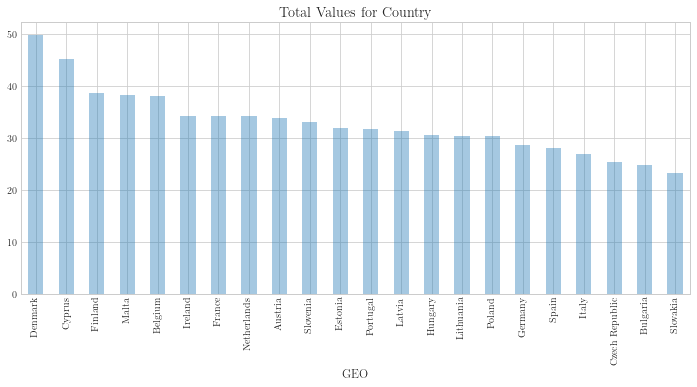

In [35]:
fig = plt.figure(figsize=(12, 5))
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar', style='b', alpha=0.4,
              title='Total Values for Country')
plt.savefig('Totalvalue_Country.png', dpi=300, bbox_inches='tight')

It is also possible to plot a DataFrame directly. In this case, each column is treated as a separated Series. For example, instead of printing the accumulated value over the years, we can plot the value for each year.


In this case, we have used a horizontal bar diagram (`kind='barh'`) stacking all the years in the same country bar. This can be done by setting the parameter **stacked** to `True`. The number of default colors in a plot is only 5, thus if you have more than 5 Series to show, you need to specify more colors or otherwise the same set of colors will be used again. We can set a new set of colors using the keyword **color** with a list of colors. Basic colors have a single-character code assigned to each, for example, 'b' is for blue, 'r' for red, 'g' for green, 'y' for yellow, 'm' for magenta and 'c' for cyan. When several Series are shown in a plot, a legend is created for identifying each one. The name for each Series is the name of the column in the DataFrame. By default, the legend goes inside the plot area. If we want to change this, we can use the **legend** function of the axis object (this is the object returned when the plot function is called). By using the **loc** keyword, we can set the relative position of the legend with respect to the plot. It can be a combination of right or left and upper, lower or center. With**bbox_to_anchor** we can set an absolute position with respect to the plot, allowing us to put the legend outside the graph.

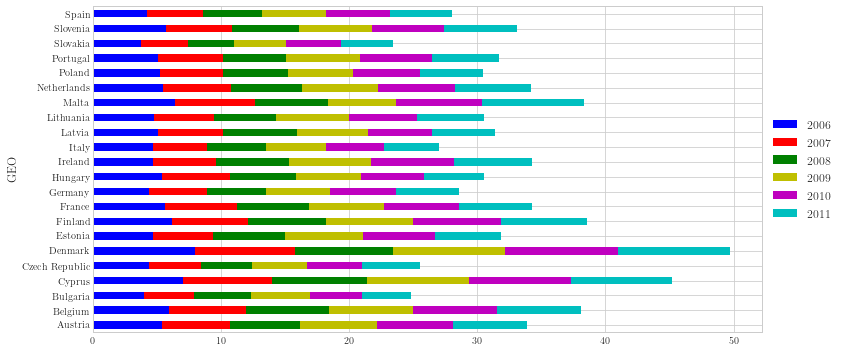

In [36]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind='barh', stacked=True, color=my_colors, figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Value_Time_Country.png', dpi=300, bbox_inches='tight')

# Further Reading
Pandas has much more functionalities. Check out the (very readable) pandas docs if you want to learn more:

http://pandas.pydata.org/pandas-docs/stable/